# Part II - (Ford GoBike System Data Slide Show)
## by (Robertson Otoo Asare)

## Dataset Overview

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area which has about 500,0000 rides since it launch in 2017. The dataset is in csv format downloaded from the udacity classroom. <a href = 'https://www.google.com/url?q=https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv&sa=D&source=editors&ust=1658999769730737&usg=AOvVaw1YaxqLLA2FiNFe9vbI4-gS'>Download here</a>.  
Visualization are created from preliminary wrangling and cleaning process to facilitate exploration analysis to discover usage pattern.


In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("fordGobike_2019.csv")

## User Types and Their weekly Usage


Subscribers have the majority of the bike usage in 2019 with a corresponding percentage of 90.8%, whereas 9.2% were consumed by cusomters.There were much more subscribers usage over customers Both on work days and weekends although subscribers were fairly stable in all days.

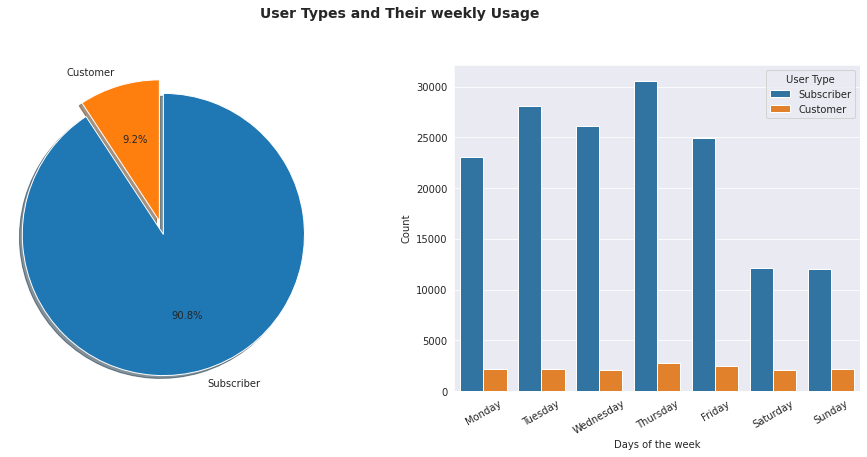

In [11]:
plt.figure(figsize=[16, 6]);
base_color = sb.color_palette('colorblind')[0];
sb.set_style('darkgrid');

plt.subplot(1, 2, 1);
sorted_vals = df.user_type.value_counts()/df.shape[0];
plt.pie(sorted_vals, explode=[0, 0.1], labels=sorted_vals.index, startangle=90, counterclock=False, autopct='%1.1f%%', shadow=True);
plt.axis('square');

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
df['start_dayofweek'] = df['start_dayofweek'].astype(weekdaycat)

plt.subplot(1, 2, 2);
ax = sb.countplot(data=df, x='start_dayofweek', hue='user_type', hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xticks(rotation=30);
plt.xlabel('Days of the week');
plt.ylabel('Count');
plt.suptitle('User Types and Their weekly Usage', fontsize=14, fontweight='semibold', y=1.015);

## Average Weekday Trip Duration for Customers and Subscribers


Subscribers ride much shorter trips compared to customers on each day of the week. Both user types had an obvious increase of trip duration on weekends, especially customers. Subscriber usage was more efficient than customers overall and maintained a stable average duration Monday through Friday.

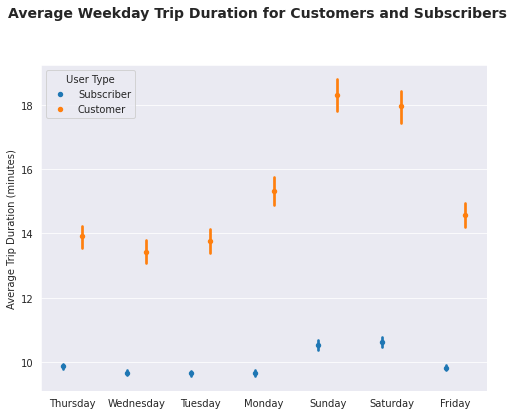

In [7]:
plt.figure(figsize=[8, 6]);
ax = sb.pointplot(data=df, x='start_dayofweek', y='duration_minute', hue='user_type', dodge=0.3, markers='.', linestyles="", hue_order=sorted_vals.index);
ax.legend(title='User Type');
plt.xlabel('');
plt.ylabel('Average Trip Duration (minutes)');
plt.suptitle('Average Weekday Trip Duration for Customers and Subscribers', fontsize=14, fontweight='semibold', y=1.015);

## Usage between customers and subscribers on daily basis

Subscriber usage goes up when people go to work in the morning and getting off work in the afternoon. Such was not observed among customers who tend to ride most in the evening and afternoon.

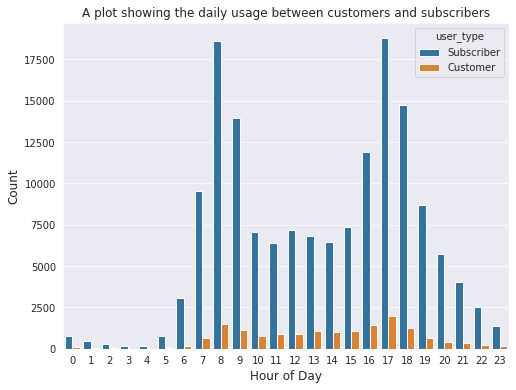

In [14]:
plt.figure(figsize=[8, 6]);
sb.countplot(data=df, x='start_hourofday', hue='user_type');
plt.title("A plot showing the daily usage between customers and subscribers")
plt.xlabel('Hour of Day', fontsize = 12);
plt.ylabel('Count', fontsize = 12);

In [16]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt